<a href="https://colab.research.google.com/github/frost-nasib/Task1-Repo/blob/main/Extra3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the full path to the CSV file: /content/extra_3.csv
    Production_Run_ID  Catalyst_Usage (kg)  Energy_Consumption (kWh)  \
0                   1                   50                       100   
1                   2                   45                        90   
2                   3                   60                       120   
3                   4                   55                       110   
4                   5                   65                       130   
5                   6                   70                       140   
6                   7                   60                       120   
7                   8                   50                       100   
8                   9                   55                       110   
9                  10                   65                       130   
10                 11                   60                       120   
11                 12                   50                       100   
12    

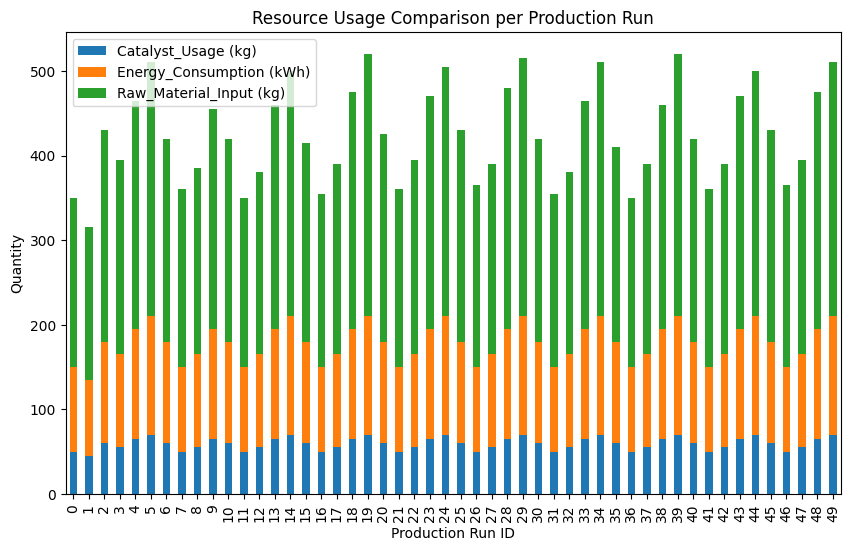

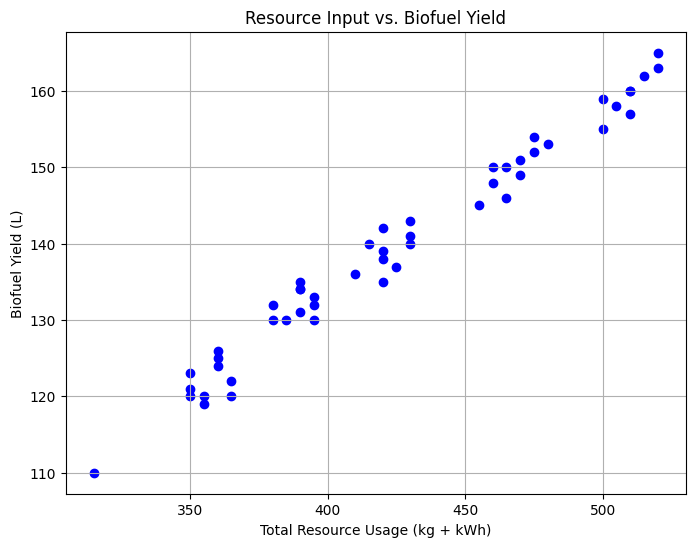

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load and preprocess data
def load_and_clean_data(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Strip whitespace and clean column names
    data.columns = data.columns.str.strip()

    # Handle missing values by dropping rows with missing entries
    data.dropna(inplace=True)

    # Ensure all numerical columns are properly formatted
    numerical_columns = [
        'Catalyst_Usage (kg)', 'Energy_Consumption (kWh)',
        'Raw_Material_Input (kg)', 'Biofuel_Yield (L)'
    ]
    for col in numerical_columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # Drop rows with invalid numerical data
    data.dropna(inplace=True)
    return data

# Step 2: Calculate resource usage and efficiency
def calculate_efficiency(data):
    # Calculate total resource usage for each run
    data['Total_Resource_Usage (kg+kWh)'] = (
        data['Catalyst_Usage (kg)'] +
        data['Energy_Consumption (kWh)'] +
        data['Raw_Material_Input (kg)']
    )

    # Calculate efficiency as yield divided by total resource input
    data['Resource_Efficiency'] = data['Biofuel_Yield (L)'] / data['Total_Resource_Usage (kg+kWh)']
    return data

# Step 3: Visualize the data
def create_visualizations(data):
    # Bar chart for resource usage comparison
    data[['Catalyst_Usage (kg)', 'Energy_Consumption (kWh)', 'Raw_Material_Input (kg)']].plot(
        kind='bar', figsize=(10, 6), stacked=True,
        title='Resource Usage Comparison per Production Run'
    )
    plt.xlabel('Production Run ID')
    plt.ylabel('Quantity')
    plt.legend(loc='upper left')
    plt.show()

    # Scatter plot for resource input vs. biofuel yield
    plt.figure(figsize=(8, 6))
    plt.scatter(data['Total_Resource_Usage (kg+kWh)'], data['Biofuel_Yield (L)'], color='blue')
    plt.title('Resource Input vs. Biofuel Yield')
    plt.xlabel('Total Resource Usage (kg + kWh)')
    plt.ylabel('Biofuel Yield (L)')
    plt.grid(True)
    plt.show()

# Main execution
def main():
    # Prompt user for file path
    file_path = input("Enter the full path to the CSV file: ")

    # Load and clean the data
    data = load_and_clean_data(file_path)

    # Calculate resource usage and efficiency
    data = calculate_efficiency(data)

    # Display the processed data
    print(data)

    # Create visualizations
    create_visualizations(data)

if __name__ == "__main__":
    main()
